# **Libraries**

In [ ]:
#Import Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

# Reading Dataset

In [ ]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [ ]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


# **Finding number of distinct values of every attribute in the dataset**

In [ ]:
distinct_values = {column: len(df[column].unique()) for column in df.columns}
distinct_df = pd.DataFrame(list(distinct_values.items()), columns=['Attribute', 'Distinct Values'])

In [ ]:
distinct_df

,Attribute,Distinct Values
0,gender,3
1,age,102
2,hypertension,2
3,heart_disease,2
4,smoking_history,6
5,bmi,4247
6,HbA1c_level,18
7,blood_glucose_level,18
8,diabetes,2


## **Hence, Hypertension, Heart_Disease and Diabetes are binary**

## **Gender and Smoking are categorical variables**

## **Finding accuracies without preprocessing**

In [ ]:
before_metrics = {}
after_metrics = {}

# Define preprocessor
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(), ['gender','smoking_history']),
#     ],
# remainder='passthrough'
# )

gender_mapping = {
    'Male': 0,
    'Female': 1,
    'Other': 2
}

# Create a mapping for smoking history, assuming the categories are 'never', 'current', 'former', 'occasionally', 'often', 'no info'
smoking_mapping = {
    'never': 0,
    'No Info': 1,
    'current': 2,
    'former': 3,
    'ever': 4,
    'not current': 5
}

data = df.copy()
# Replace the 'gender' and 'smoking_history' columns using the mapping
data['gender'] = data['gender'].replace(gender_mapping)
data['smoking_history'] = data['smoking_history'].replace(smoking_mapping)

# Split data into features and target variable
X = data.drop('diabetes', axis=1)
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for name,model in classifiers.items():
#     clf = imbPipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('classifier', model)
#     ])

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy:", accuracy_score(y_test, y_pred))
    before_metrics[name] = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.937
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18292
           1       0.70      0.46      0.55      1708

    accuracy                           0.94     20000
   macro avg       0.83      0.72      0.76     20000
weighted avg       0.93      0.94      0.93     20000

Support Vector Machine Accuracy: 0.9473
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18292
           1       1.00      0.38      0.55      1708

    accuracy                           0.95     20000
   macro avg       0.97      0.69      0.76     20000
weighted avg       0.95      0.95      0.94     20000

Random Forest Accuracy: 0.9703
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.

## EDA

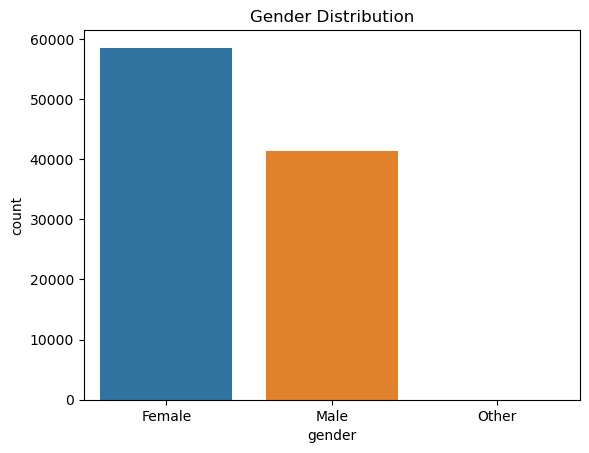

In [ ]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [ ]:
print(f"The count of Gender - Other: {len(df[df['gender'] == 'Other'])}")

The count of Gender - Other: 18


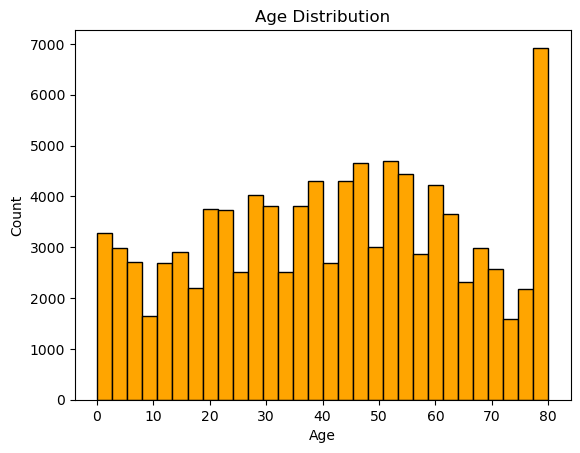

In [ ]:
# Histogram for age
plt.hist(df['age'], bins=30, color='orange', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

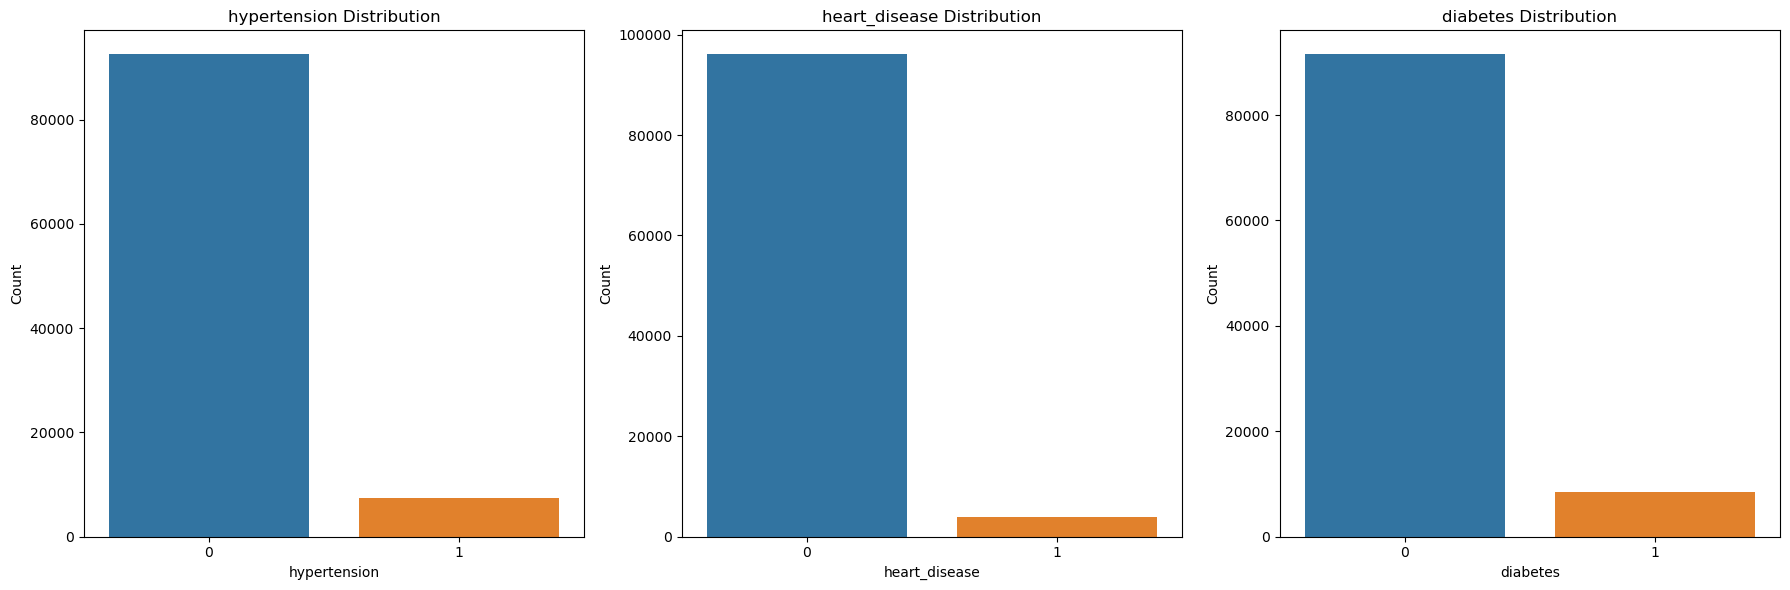

In [ ]:
# Define the list of columns for visualization
columns = ['hypertension', 'heart_disease', 'diabetes']
plt.figure(figsize=(18, 6))

# Create a subplot for visualization
for index, col in enumerate(columns):
    plt.subplot(1, 3, index + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

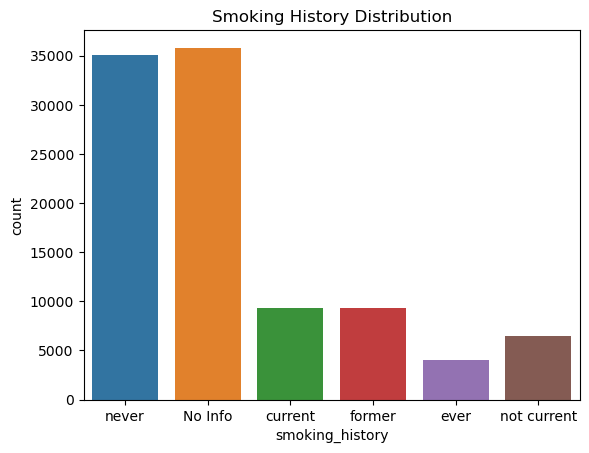

In [ ]:
# Visualize the distribution of smoking history using a count plot
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

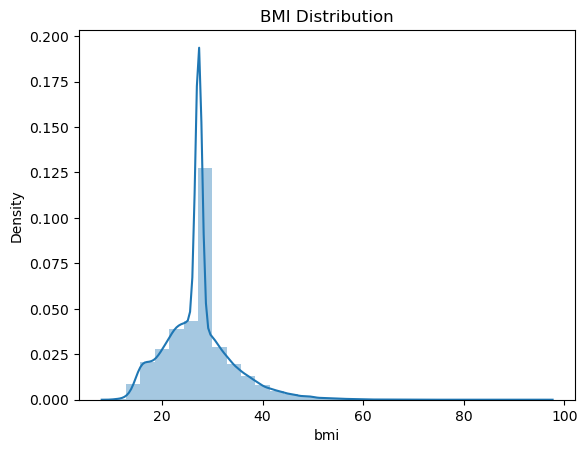

In [ ]:
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

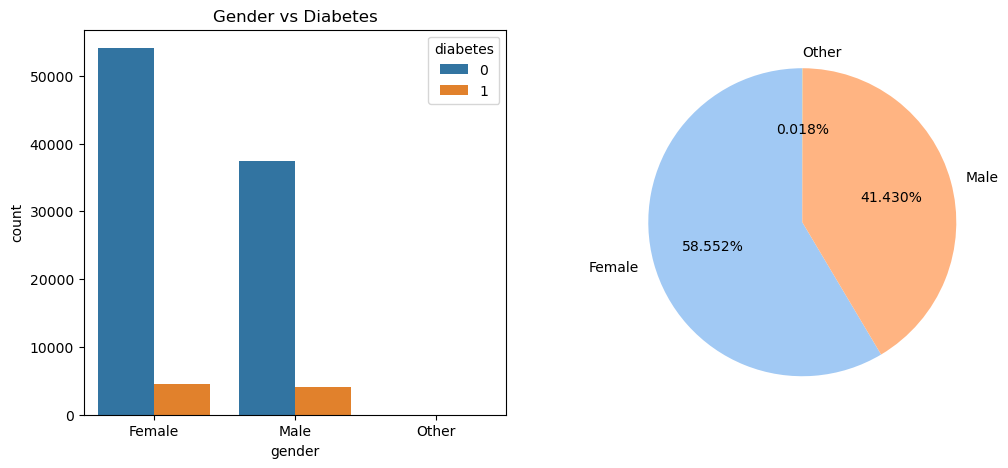

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='gender', hue='diabetes', data=df.astype(str), ax=ax[0])

ax[0].set_title('Gender vs Diabetes')

# Pie plot
data_counts = df['gender'].value_counts()
ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.3f%%', startangle=90, colors=sns.color_palette('pastel'))
# ax[1].set_title(f'Pie plot for {df["gender"]}')
plt.show()

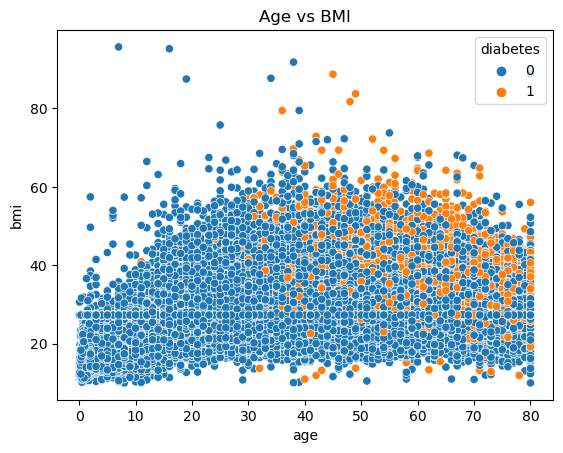

In [ ]:
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

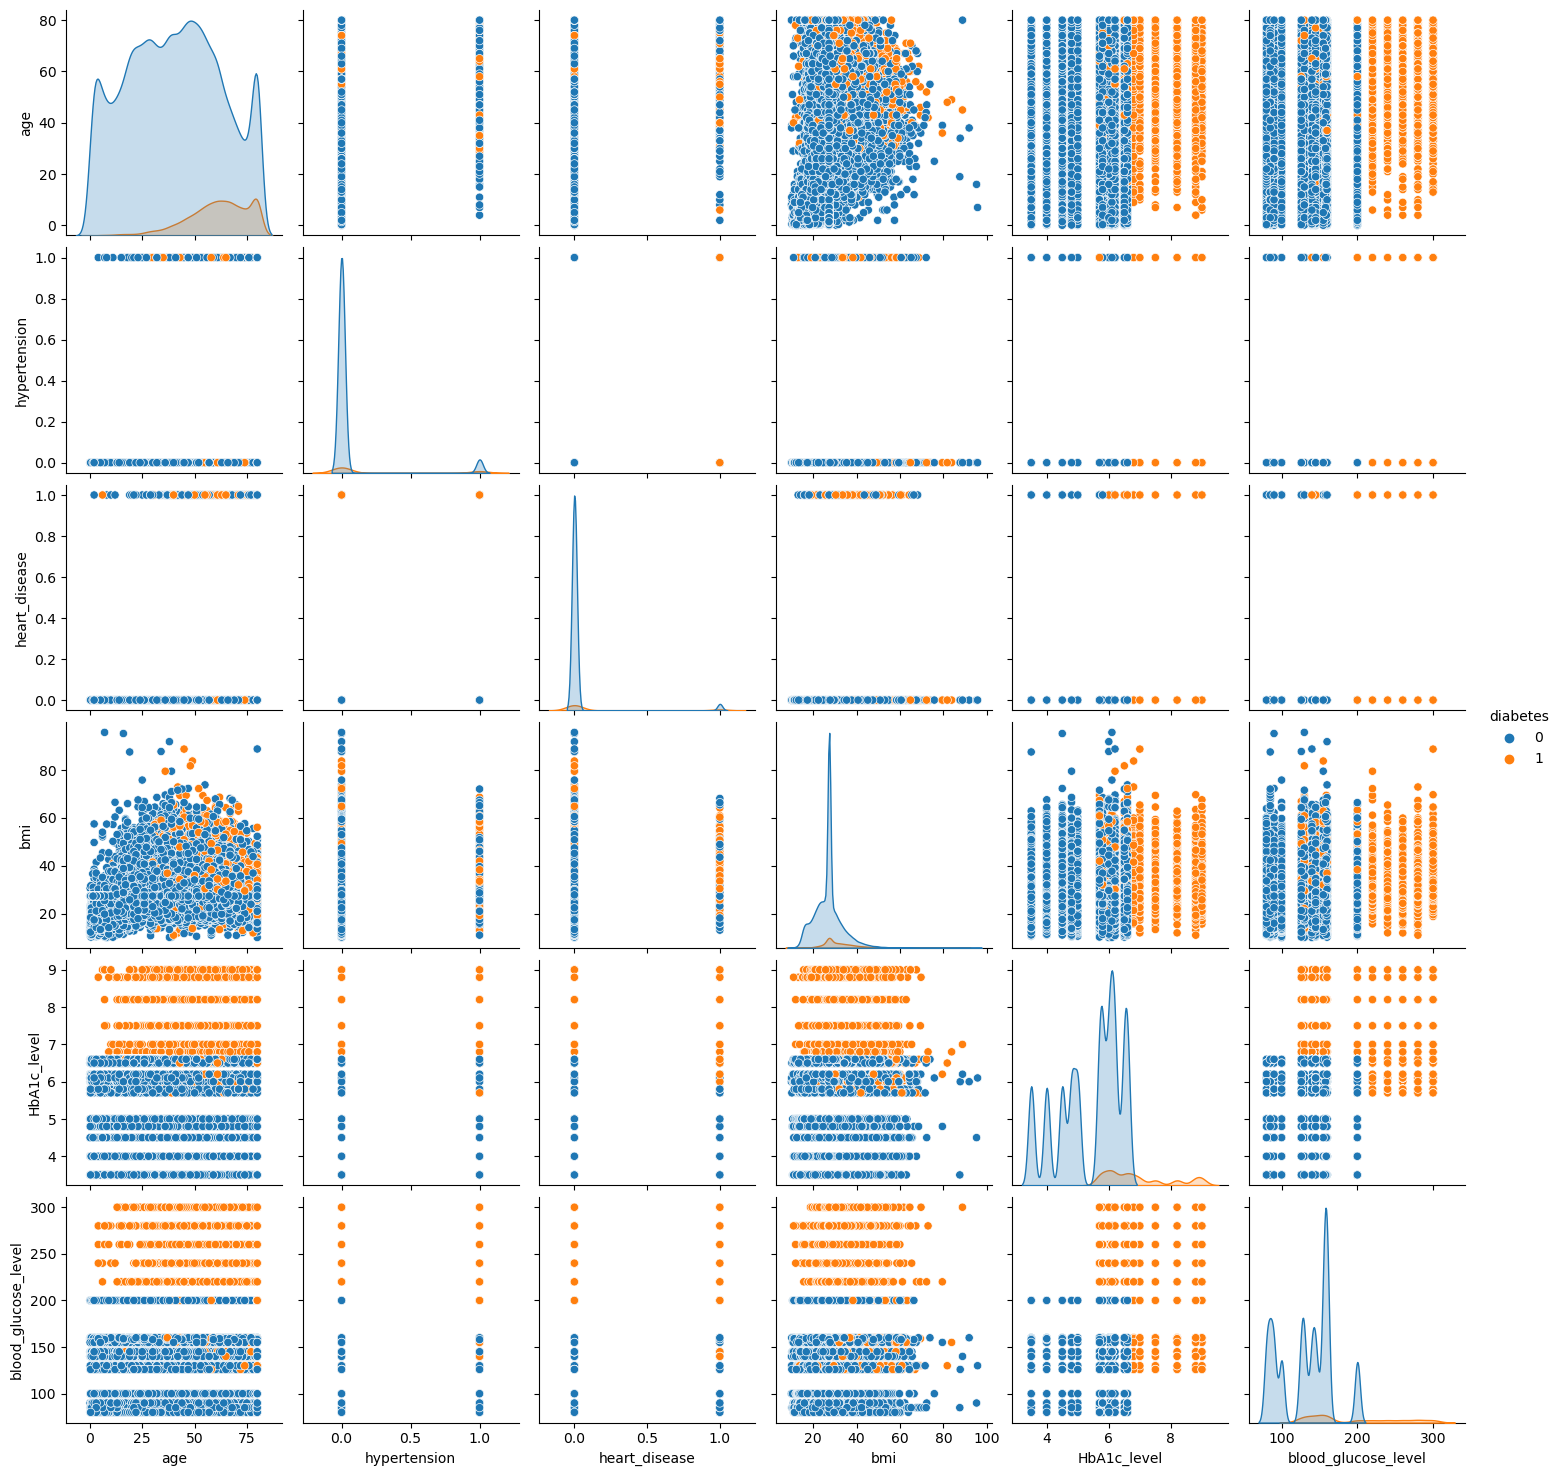

In [ ]:
sns.pairplot(df, hue='diabetes')
plt.show()

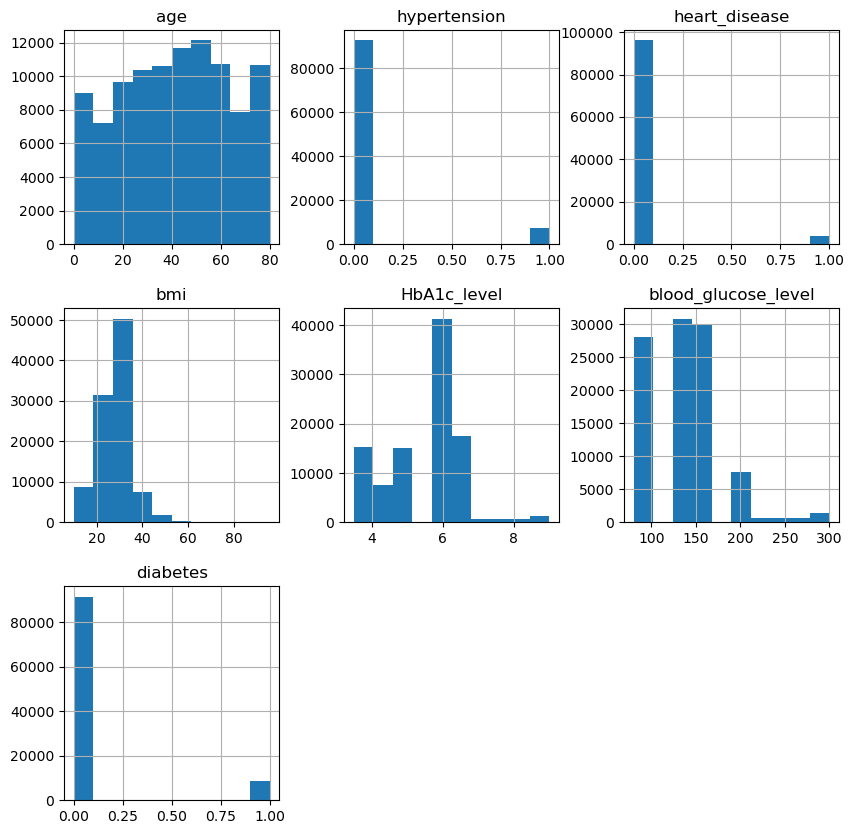

In [ ]:
df.hist(figsize = (10,10))
plt.show()

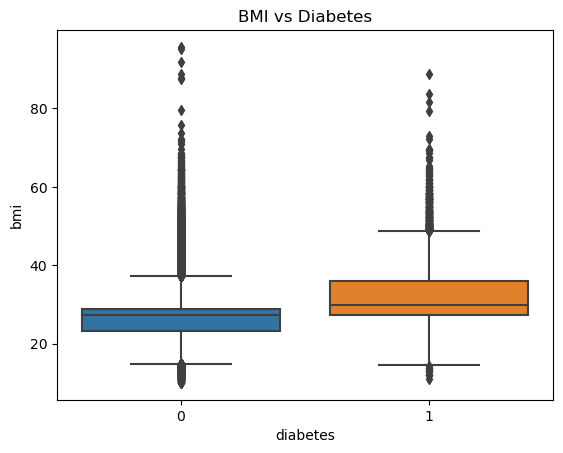

In [ ]:
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

# Preprocessing

### Duplicate and Outlier Data Handling

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate rows count: ", duplicate_rows.shape)

Duplicate rows count:  (3854, 9)


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

In [ ]:
# Checking null values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
df = df[df['gender'] != 'Other']

In [ ]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


### Recategorizing 'smoking_history' Feature

In [ ]:
def assign_categories(status):
    if status in ['never', 'No Info']:
        return 'Non-Smoker'
    elif status == 'current':
        return 'Current Smoker'
    elif status in ['ever', 'former', 'not current']:
        return 'Past Smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(assign_categories)

# Check the new value counts
print(df['smoking_history'].value_counts())

Non-Smoker        67276
Past Smoker       19655
Current Smoker     9197
Name: smoking_history, dtype: int64


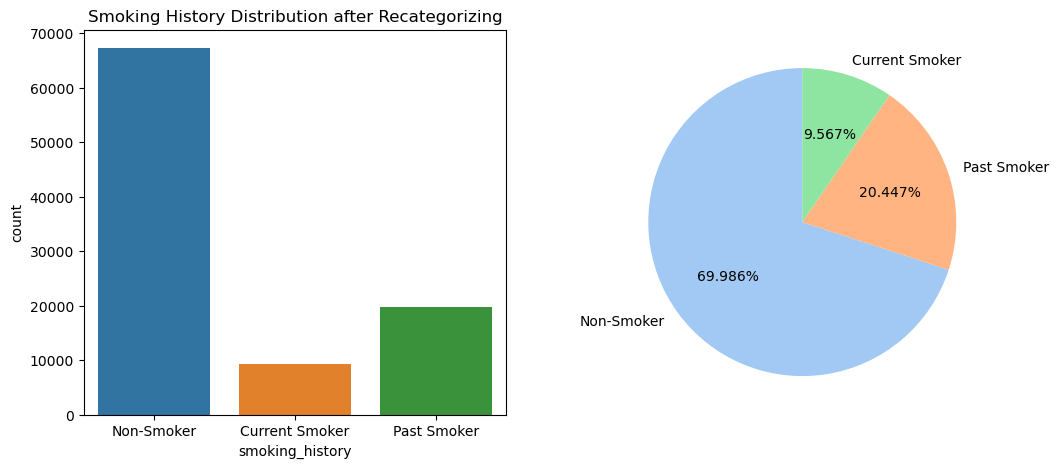

In [ ]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='smoking_history', data=df, ax=ax[0])
ax[0].set_title('Smoking History Distribution after Recategorizing')

data_counts = df['smoking_history'].value_counts()
ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.3f%%', startangle=90, colors=sns.color_palette('pastel'))
# ax[1].set_title(f'Pie plot for {df["smoking_history"]}')
plt.show()

In [ ]:
data = df.copy()

# Feature Engineering

### One-Hot Encoding

In [ ]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

In [ ]:
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_Current Smoker,smoking_history_Non-Smoker,smoking_history_Past Smoker
0,80.00,0,1,25.19,6.60,140,0,1,0,0,1,0
1,54.00,0,0,27.32,6.60,80,0,1,0,0,1,0
2,28.00,0,0,27.32,5.70,158,0,0,1,0,1,0
3,36.00,0,0,23.45,5.00,155,0,1,0,1,0,0
4,76.00,1,1,20.14,4.80,155,0,0,1,1,0,0


### Generating Correlation-Matrix to check correlation of all features with 'diabetes'

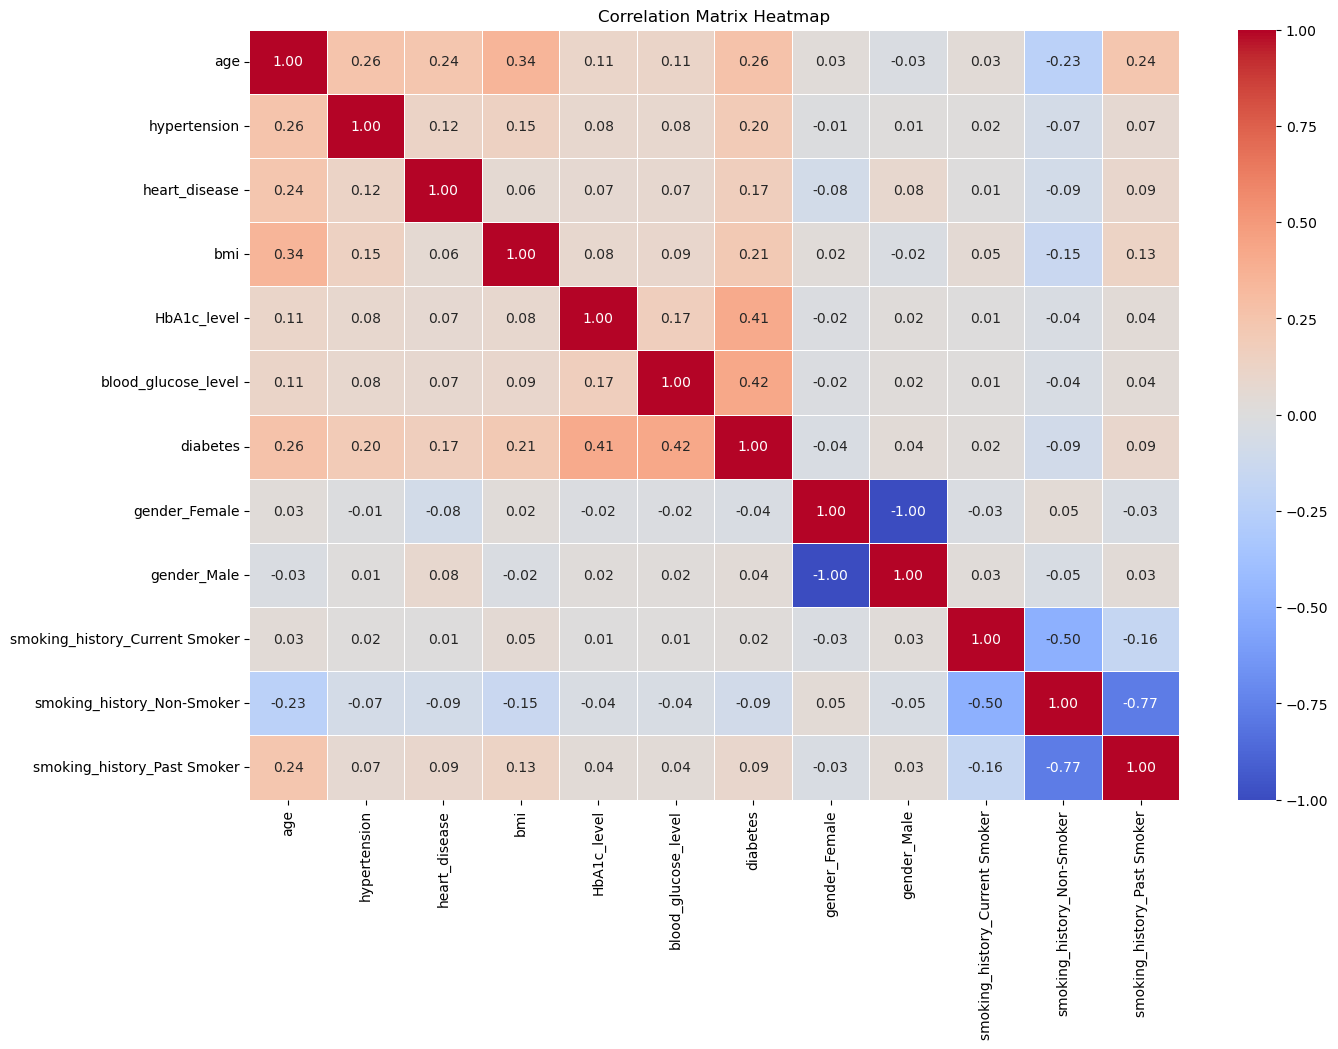

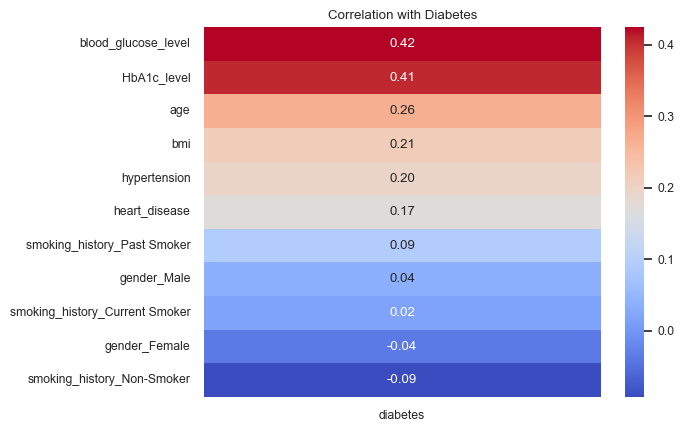

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

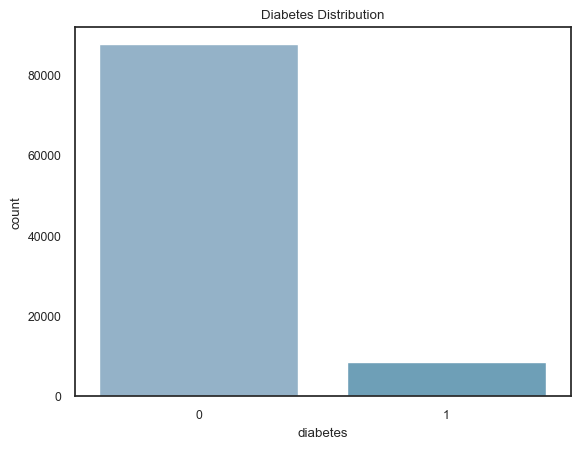

In [ ]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

### Using SMOTE to balance the dataset

In [ ]:
# Define resampling
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.3)

###  Scaling Numeric Features and Encoding Categorical Features

In [ ]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

# Split data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [ ]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'bmi', 'HbA1c_level',
                                  'blood_glucose_level', 'hypertension',
                                  'heart_disease']),
                                ('cat', OneHotEncoder(),
                                 ['gender', 'smoking_history'])])

In [ ]:
X_transformed = preprocessor.transform(X)

In [ ]:
column_names = preprocessor.transformers_[0][2] + list(preprocessor.named_transformers_['cat'].get_feature_names_out())

# Create a DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=column_names)

In [ ]:
X_transformed_df.head()

,age,bmi,HbA1c_level,blood_glucose_level,hypertension,heart_disease,gender_Female,gender_Male,smoking_history_Current Smoker,smoking_history_Non-Smoker,smoking_history_Past Smoker
0,1.70,-0.31,0.99,0.04,-0.29,4.85,1.00,0.00,0.00,1.00,0.00
1,0.54,-0.00,0.99,-1.42,-0.29,-0.21,1.00,0.00,0.00,1.00,0.00
2,-0.61,-0.00,0.16,0.48,-0.29,-0.21,0.00,1.00,0.00,1.00,0.00
3,-0.26,-0.57,-0.50,0.41,-0.29,-0.21,1.00,0.00,1.00,0.00,0.00
4,1.52,-1.06,-0.68,0.41,3.45,4.85,0.00,1.00,1.00,0.00,0.00


# Model Training and Testing

### Creating arrays to store all scores of various classifiers

In [ ]:
allClassifiers = ['Random Forest', 'Support Vector Machine', 'Logistic Regression', 'K Nearest Neighbour', 'Gradient Boosting']
allFPR = [0,0,0,0,0]
allTPR = [0,0,0,0,0]
allThresholds = [0,0,0,0,0]
allROC_AUC = [0,0,0,0,0]
allAccuracies = [0,0,0,0,0]

## Random Forest Classifier

### Setting up pipeline for model training and testing

In [ ]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
clf = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', RandomForestClassifier())])

### Setting up parameters for hyperparameter tuning

In [ ]:
# Define the hyperparameters and the values we want to test
param_grid = {
    'classifier__n_estimators': [50],
    'classifier__max_depth': [10],
    'classifier__min_samples_split': [5],
    'classifier__min_samples_leaf': [4]
}

### Model Training

In [ ]:
# Create Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}


In [ ]:
best_model = grid_search.best_estimator_

### Model Testing

Model Accuracy:  0.9675959637990221
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17525
           1       0.92      0.69      0.79      1701

    accuracy                           0.97     19226
   macro avg       0.95      0.84      0.89     19226
weighted avg       0.97      0.97      0.97     19226



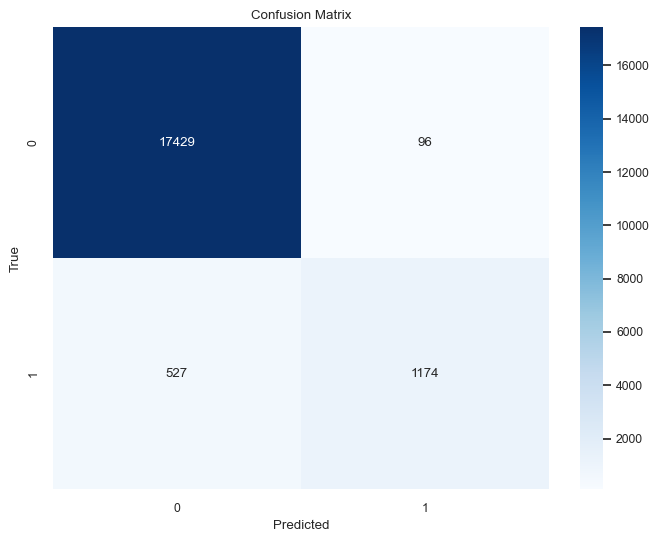

In [ ]:
# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
RFAcc = accuracy_score(y_test, y_pred)
print("Model Accuracy: ", RFAcc)
after_metrics['Random Forest'] = classification_report(y_test, y_pred, output_dict=True)

print(classification_report(y_test, y_pred))
allAccuracies[0] = RFAcc

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Compute ROC and AUC Score

In [ ]:
y_pred_proba = best_model.predict_proba(X_test)[:,1]
allFPR[0], allTPR[0], allThresholds[0] = roc_curve(y_test, y_pred_proba)
allROC_AUC[0] = roc_auc_score(y_test, y_pred_proba)

## Support Vector Machine

### Setting up pipeline for model training and testing

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Support Vector Machine
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']
categorical_features = ['gender', 'smoking_history']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

clf = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('over', over),
    ('under', under),
    ('classifier', SVC(probability=True))
])

### Hyperparameter Tuning

In [ ]:
param_distributions = {
    'classifier__C': [100],  # Regularization parameter
    'classifier__gamma': ['scale'],  # Kernel coefficient
    'classifier__kernel': ['poly']  # Kernel type
}

### Model Training

In [ ]:
random_search = RandomizedSearchCV(clf, param_distributions=param_distributions, n_iter=10, cv=5, n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_search.fit(X_train, y_train)
print("Best Parameters: ", random_search.best_params_)

Best Parameters:  {'classifier__kernel': 'poly', 'classifier__gamma': 'scale', 'classifier__C': 100}


In [ ]:
best_model = random_search.best_estimator_

### Model Testing

Model Accuracy:  0.9622906480807241
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17525
           1       0.83      0.72      0.77      1701

    accuracy                           0.96     19226
   macro avg       0.90      0.85      0.88     19226
weighted avg       0.96      0.96      0.96     19226



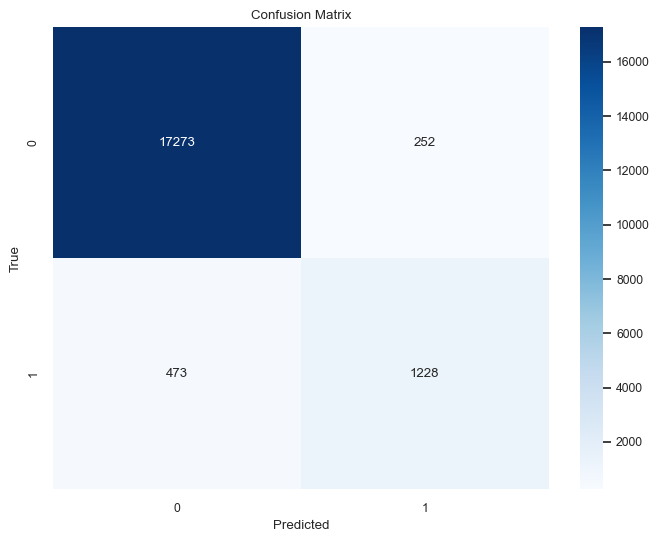

In [ ]:
# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
SVCAcc = accuracy_score(y_test, y_pred)
print("Model Accuracy: ", SVCAcc)
after_metrics['Support Vector Machine'] = classification_report(y_test, y_pred, output_dict=True)

print(classification_report(y_test, y_pred))
allAccuracies[1] = SVCAcc

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Compute ROC and AUC Score

In [ ]:
y_pred_proba = best_model.predict_proba(X_test)[:,1]
allFPR[1], allTPR[1], allThresholds[1] = roc_curve(y_test, y_pred_proba)
allROC_AUC[1] = roc_auc_score(y_test, y_pred_proba)

## Logistic Regression

### Setting up pipeline for model training and testing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

clf = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('over', over),
    ('under', under),
    ('classifier', LogisticRegression())
])

### Hyperparameter grid for Logistic Regression

In [ ]:
param_grid = {
    'classifier__C': [0.0001],
    'classifier__penalty': ['l1'],
    'classifier__solver': ['liblinear'],
    'classifier__max_iter': [300]
}


### Model Training

In [ ]:
# Perform GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters for {name}: {grid_search.best_params_}")

Best parameters for K-Nearest Neighbors: {'classifier__C': 0.0001, 'classifier__max_iter': 300, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

### Model Testing

Model Accuracy:  0.9528243004265058
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     17525
           1       0.91      0.52      0.66      1701

    accuracy                           0.95     19226
   macro avg       0.93      0.76      0.82     19226
weighted avg       0.95      0.95      0.95     19226



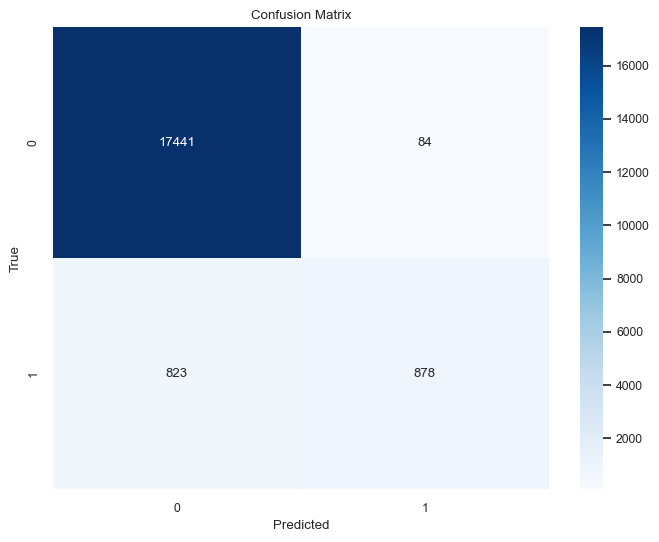

In [ ]:
y_pred = best_model.predict(X_test)
LRAcc = accuracy_score(y_test, y_pred)
print("Model Accuracy: ", LRAcc)
after_metrics['Logistic Regression'] = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))
allAccuracies[2] = LRAcc

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Compute ROC curve and ROC area

In [ ]:
y_pred_proba = best_model.predict_proba(X_test)[:,1]
allFPR[2], allTPR[2], allThresholds[2] = roc_curve(y_test, y_pred_proba)
allROC_AUC[2] = roc_auc_score(y_test, y_pred)

## K-Nearest Neighbors Classifier

### Setting up pipeline for model training and testing

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier pipeline
clf = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('over', over),
    ('under', under),
    ('classifier', KNeighborsClassifier())
])

### Define the parameter grid for KNN

In [ ]:
param_grid = {
    'classifier__n_neighbors': [400],
    'classifier__weights': ['uniform'],
    'classifier__p': [1]  # Manhattan or Euclidean distance
}

### Model Training

In [ ]:
# Create GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__n_neighbors': 400, 'classifier__p': 1, 'classifier__weights': 'uniform'}


In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

### Model Testing

Model Accuracy:  0.9536044939144908
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17525
           1       0.78      0.66      0.72      1701

    accuracy                           0.95     19226
   macro avg       0.88      0.82      0.84     19226
weighted avg       0.95      0.95      0.95     19226



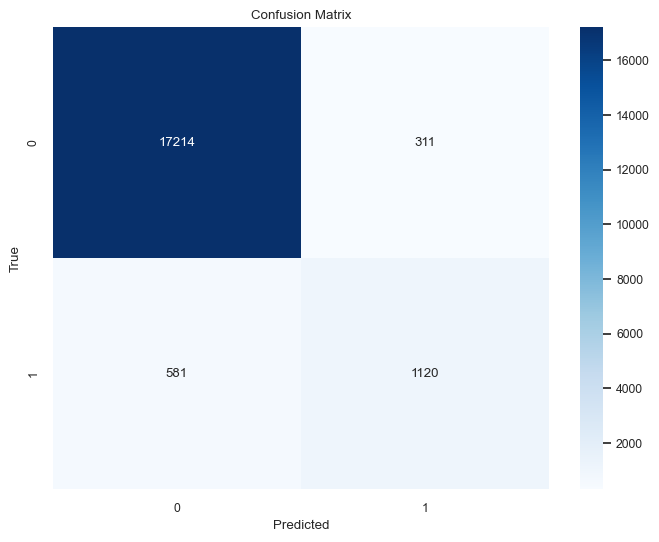

In [ ]:
# Evaluate the best model
y_pred = best_model.predict(X_test)
KNNAcc = accuracy_score(y_test, y_pred)
print("Model Accuracy: ", KNNAcc)
after_metrics['K-Nearest Neighbors'] = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))
allAccuracies[3] = KNNAcc

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Compute ROC and AUC Score

In [ ]:
y_pred_proba = best_model.predict_proba(X_test)[:,1]
allFPR[3], allTPR[3], allThresholds[3] = roc_curve(y_test, y_pred_proba)
allROC_AUC[3] = roc_auc_score(y_test, y_pred_proba)

## Gradient Boosting Classifier

### Setting up pipeline for model training and testing

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

clf = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('over', over),
    ('under', under),
    ('classifier', GradientBoostingClassifier())
])

### Defining hyperparameters and values

In [ ]:
param_grid = {
    'classifier__n_estimators': [200],
    'classifier__learning_rate': [0.1],
    'classifier__max_depth': [3],
    'classifier__min_samples_split': [5],
    'classifier__min_samples_leaf': [2]
}

### Model Training

In [ ]:
# Create Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

### Model Testing

Model Accuracy:  0.9692603765733901
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       0.98      0.67      0.79      1701

    accuracy                           0.97     19226
   macro avg       0.97      0.83      0.89     19226
weighted avg       0.97      0.97      0.97     19226



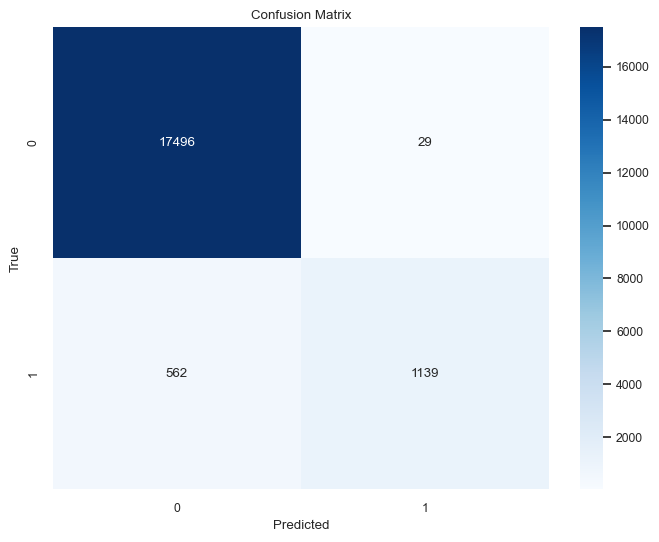

In [ ]:
# Evaluate the model
y_pred = best_model.predict(X_test)
GBAcc = accuracy_score(y_test, y_pred)
print("Model Accuracy: ", GBAcc)
after_metrics['Gradient Boosting'] = classification_report(y_test, y_pred, output_dict=True)

print(classification_report(y_test, y_pred))
allAccuracies[4] = GBAcc

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Compute ROC and AUC Score

In [ ]:
y_pred_proba = best_model.predict_proba(X_test)[:,1]

In [ ]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('over', SMOTE(sampling_strategy=0.3)),
                ('under', RandomUnderSampler(sampling_strategy=0.3)),
                ('classifier',
                 GradientBoostingClassifier(min_samples_leaf=2,
                                            min_samples_split=5,
                                            n_estimators=200))])

In [ ]:
allFPR[4], allTPR[4], allThresholds[4] = roc_curve(y_test, y_pred_proba)
allROC_AUC[4] = roc_auc_score(y_test, y_pred_proba)

# Model Evaluations & Metrics

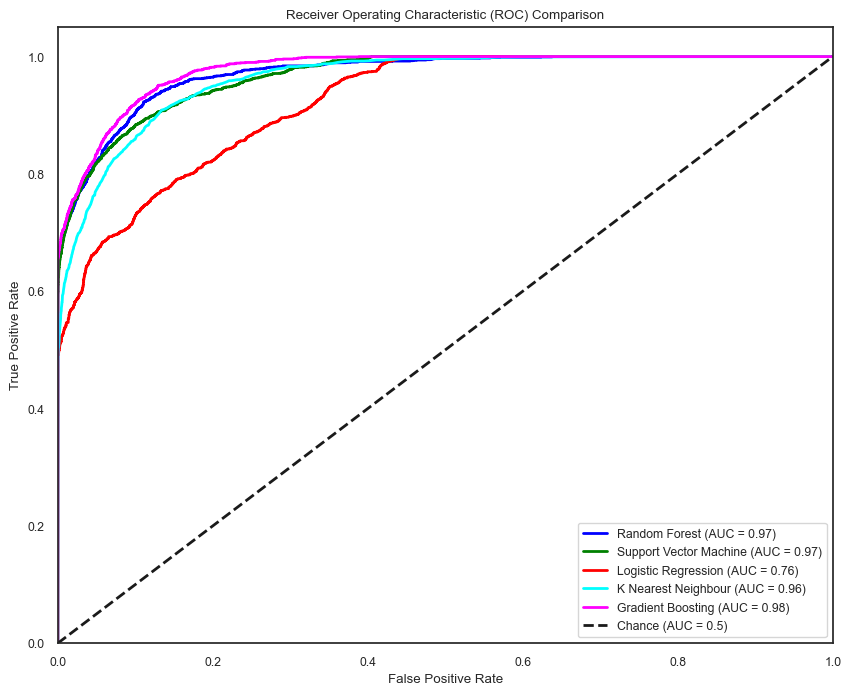

In [ ]:
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'grey']

for i in range(len(allClassifiers)):
  # Plot ROC curve for the current classifier
  plt.plot(allFPR[i], allTPR[i], color=colors[i], lw=2, label=f'{allClassifiers[i]} (AUC = {allROC_AUC[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, linestyle='--', label='Chance (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Comparison')
plt.legend(loc="lower right")
plt.show()

In [ ]:
after_metrics

{'Random Forest': {'0': {'precision': 0.9699783176738755,
   'recall': 0.995549215406562,
   'f1-score': 0.9825974318540212,
   'support': 17525.0},
  '1': {'precision': 0.937046004842615,
   'recall': 0.6825396825396826,
   'f1-score': 0.789795918367347,
   'support': 1701.0},
  'accuracy': 0.9678560282950172,
  'macro avg': {'precision': 0.9535121612582453,
   'recall': 0.8390444489731224,
   'f1-score': 0.886196675110684,
   'support': 19226.0},
  'weighted avg': {'precision': 0.9670646661537479,
   'recall': 0.9678560282950172,
   'f1-score': 0.9655395220214593,
   'support': 19226.0}},
 'Support Vector Machine': {'0': {'precision': 0.973559589581689,
   'recall': 0.9853922967189729,
   'f1-score': 0.9794402064486856,
   'support': 17525.0},
  '1': {'precision': 0.8279569892473119,
   'recall': 0.7242798353909465,
   'f1-score': 0.7726560050172467,
   'support': 1701.0},
  'accuracy': 0.9622906480807241,
  'macro avg': {'precision': 0.9007582894145004,
   'recall': 0.85483606605495

In [ ]:
before_metrics

{'Logistic Regression': {'0': {'precision': 0.9510593220338983,
   'recall': 0.9816313142357315,
   'f1-score': 0.9661035187775745,
   'support': 18292.0},
  '1': {'precision': 0.7,
   'recall': 0.45901639344262296,
   'f1-score': 0.5544554455445545,
   'support': 1708.0},
  'accuracy': 0.937,
  'macro avg': {'precision': 0.8255296610169491,
   'recall': 0.7203238538391772,
   'f1-score': 0.7602794821610646,
   'support': 20000.0},
  'weighted avg': {'precision': 0.9296188559322034,
   'recall': 0.937,
   'f1-score': 0.9309487733234746,
   'support': 20000.0}},
 'Support Vector Machine': {'0': {'precision': 0.945518453427065,
   'recall': 1.0,
   'f1-score': 0.971996386630533,
   'support': 18292.0},
  '1': {'precision': 1.0,
   'recall': 0.382903981264637,
   'f1-score': 0.5537679932260796,
   'support': 1708.0},
  'accuracy': 0.9473,
  'macro avg': {'precision': 0.9727592267135325,
   'recall': 0.6914519906323184,
   'f1-score': 0.7628821899283063,
   'support': 20000.0},
  'weighted

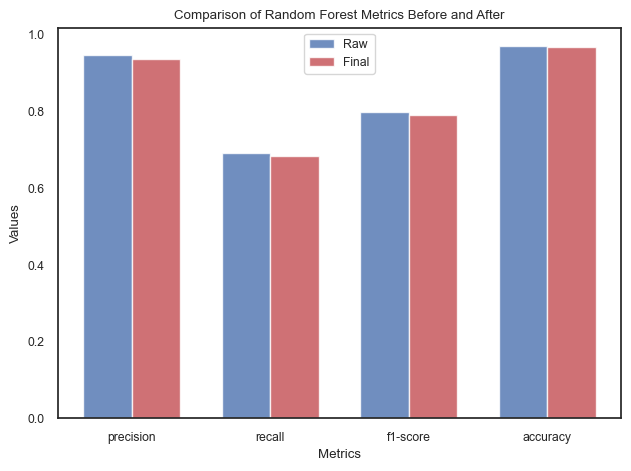

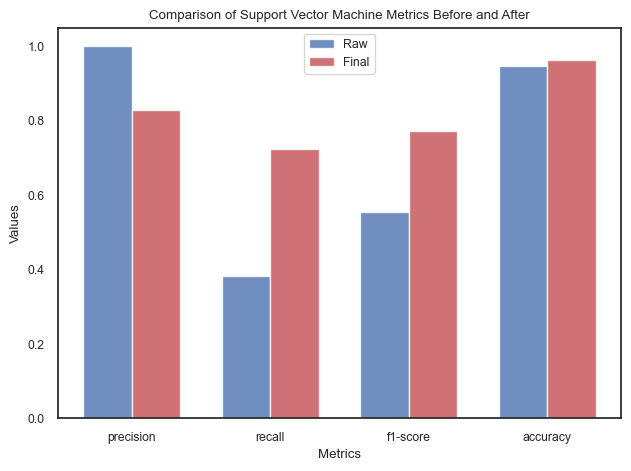

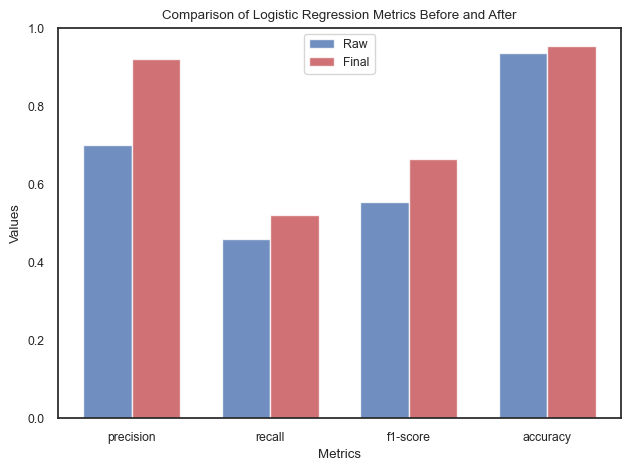

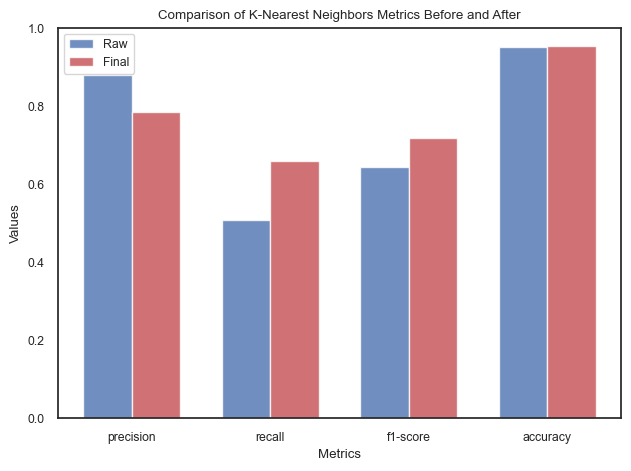

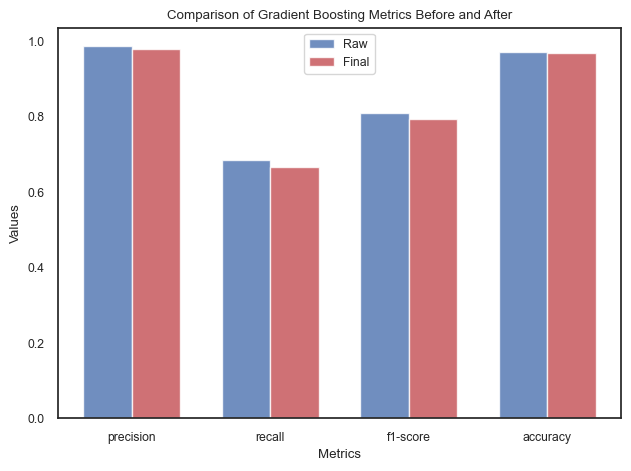

In [ ]:
metrics = ['precision', 'recall', 'f1-score', 'accuracy']
models = ['Random Forest', 'Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors', 'Gradient Boosting']
# models = ['Logistic Regression', 'Random Forest']

for model in models:
    # Prepare the data
    values_before = []
    values_after = []
    for metric in metrics:
        if metric == 'accuracy':
            values_before.append(before_metrics[model][metric])
            values_after.append(after_metrics[model][metric])
        else:
            values_before.append(before_metrics[model]['1'][metric])
            values_after.append(after_metrics[model]['1'][metric])

# for metric in metrics:
#     if metric == 'accuracy':
#         values_before.append(before_metrics['K-Nearest Neighbors'][metric])
#         values_after.append(after_metrics['K-Nearest Neighbors'][metric])
#     else:
#         values_before.append(before_metrics['K-Nearest Neighbors']['1'][metric])
#         values_after.append(after_metrics['K-Nearest Neighbors']['1'][metric])

# Setting up the bar chart
    n = len(metrics)  # number of metrics
    index = np.arange(n)  # array of metrics indices
    bar_width = 0.35
    opacity = 0.8

    fig, ax = plt.subplots()
    bars_before = ax.bar(index, values_before, bar_width, alpha=opacity, color='b', label='Raw')
    bars_after = ax.bar(index + bar_width, values_after, bar_width, alpha=opacity, color='r', label='Final')

    # Adding labels and titles
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Values')
    ax.set_title(f'Comparison of {model} Metrics Before and After')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(metrics)
    ax.legend()

    # Show plot
    plt.tight_layout()
    plt.show()